## 加装库和数据

In [4]:
!pip install wfdb
!pip install pyts
!pip install -U scikit-learn
!pip install PyWavelets
!pip install spt
!wget -r -N -c -np https://physionet.org/files/mitdb/1.0.0/
# 利用wget完成数据下载

--2024-05-07 11:18:08--  https://physionet.org/files/mitdb/1.0.0/
Resolving physionet.org (physionet.org)... 18.13.52.205
Connecting to physionet.org (physionet.org)|18.13.52.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘physionet.org/files/mitdb/1.0.0/index.html’

physionet.org/files     [ <=>                ]  22.86K  --.-KB/s    in 0.02s   

Last-modified header missing -- time-stamps turned off.
2024-05-07 11:18:09 (1.08 MB/s) - ‘physionet.org/files/mitdb/1.0.0/index.html’ saved [23410]

Loading robots.txt; please ignore errors.
--2024-05-07 11:18:09--  https://physionet.org/robots.txt
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK

    The file is already fully retrieved; nothing to do.

--2024-05-07 11:18:09--  https://physionet.org/files/mitdb/1.0.0/mitdbdir/
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 304 Not Modifie

## 导入库

In [3]:
# 导入库
import wfdb
import numpy as np
import matplotlib.pyplot as plt
from spt.plot_params import set_roman_plot_params
import pywt
import pandas as pd

### 找到V型心拍


In [10]:
set_roman_plot_params()
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

record = wfdb.rdrecord('./physionet.org/files/mitdb/1.0.0/109', # 文件所在路径
                       sampfrom=0, # 读取100这个记录的起点，从第0个点开始读
                       sampto=4000, # 读取记录的终点，到1000个点结束
                       physical=False, # 若为True则读取原始信号p_signal，如果为False则读取数字信号d_signal，默认为False
                       channels=[0]) # 读取那个通道，也可以用channel_names指定某个通道;如channel_names=['MLII']
# 小波去噪
def denoise(data):
    # 小波变换
    coeffs = pywt.wavedec(data=data, wavelet='db5', level=8)
    cD9, cD8, cD7, cD6, cD5, cD4, cD3, cD2, cD1 = coeffs

    # 阈值去噪
    threshold = (np.median(np.abs(cD1)) / 0.6745) * (np.sqrt(2 * np.log(len(cD1))))
    cD1.fill(0)
    cD2.fill(0)
    for i in range(1, len(coeffs) - 2):
        coeffs[i] = pywt.threshold(coeffs[i], threshold)

    # 小波反变换,获取去噪后的信号
    rdata = pywt.waverec(coeffs=coeffs, wavelet='db5')
    return rdata
# 转为数字信号
signal = record.d_signal[0:1000]
amplitude = (signal - np.min(signal))
amplitude = amplitude - np.mean(amplitude)
amplitude = amplitude / np.max(amplitude)
amplitude = pd.DataFrame(amplitude)
amplitude.to_csv('ecg_V.csv')  #未去噪的V类ECG数据
# plt.plot(amplitude)
# plt.show()

# signal = denoise(signal)



### 找到了N型心拍

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

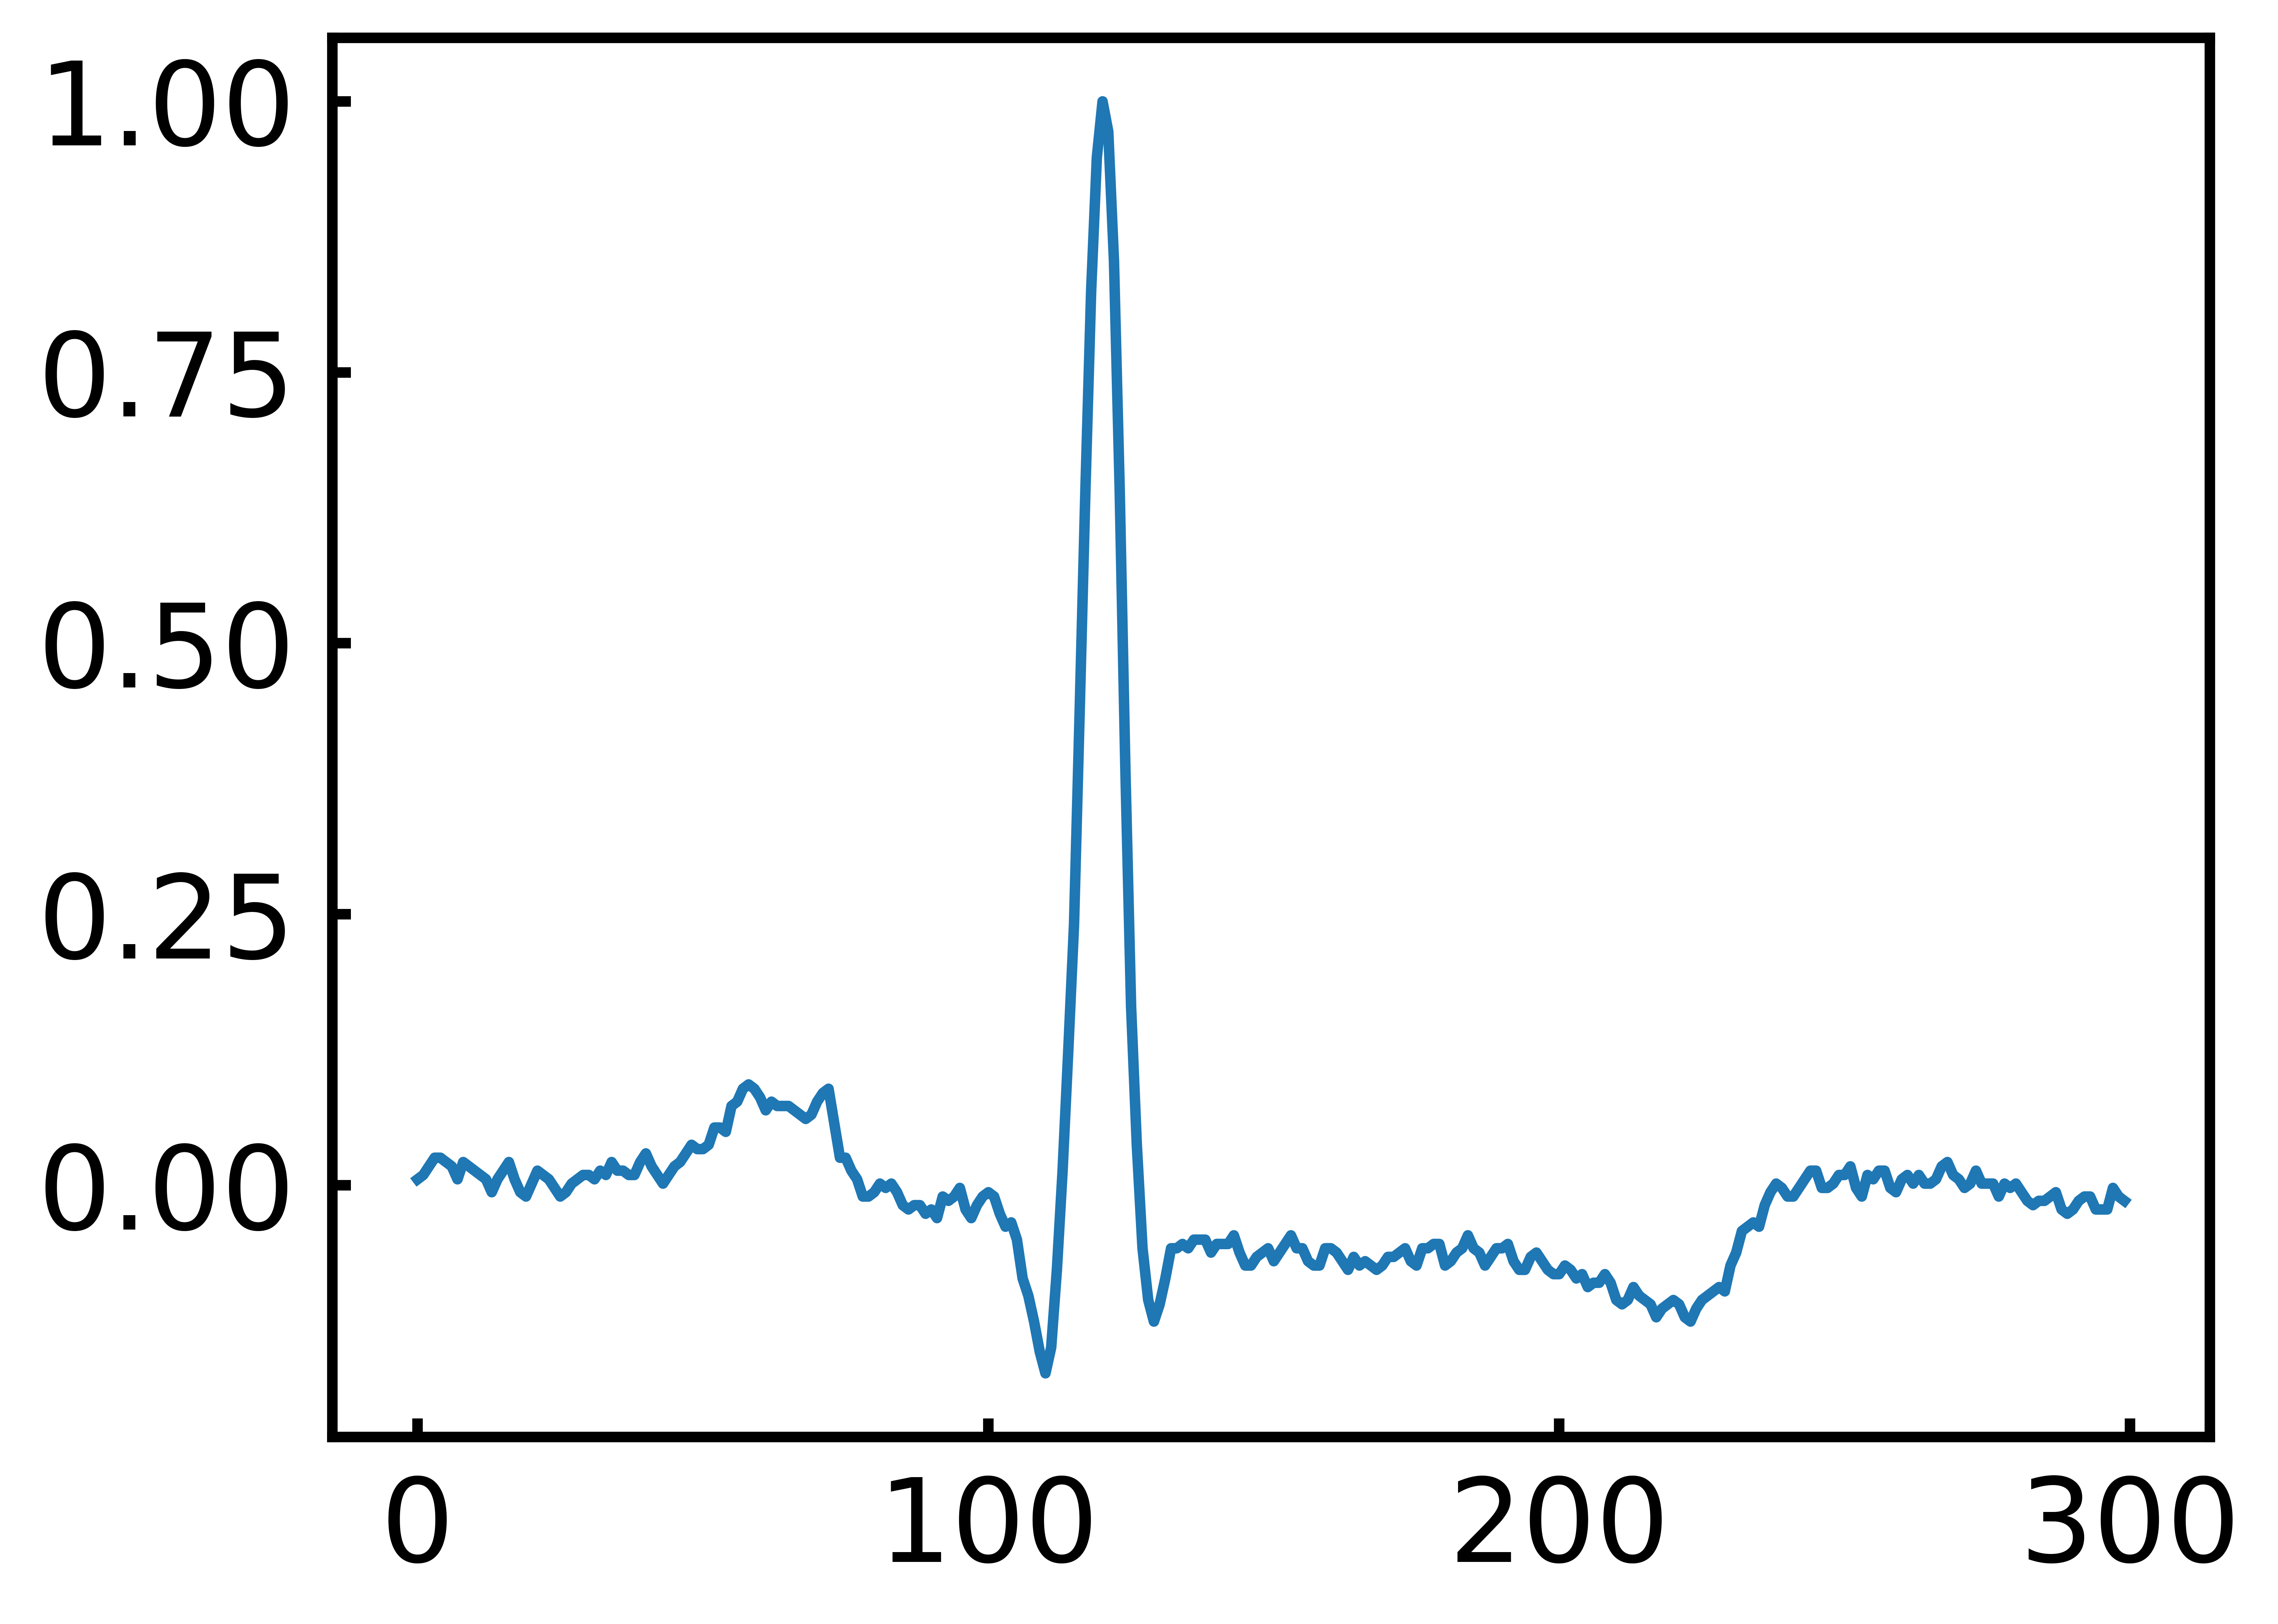

['N']


In [4]:
# 获取心拍，并分类

url= './physionet.org/files/mitdb/1.0.0/100'
sampfrom=250
sampto=550
record = wfdb.rdrecord(url, # 文件所在路径
                       sampfrom=sampfrom, # 读取100这个记录的起点，从第0个点开始读
                       sampto=sampto, # 读取记录的终点，到1000个点结束
                       physical=False, # 若为True则读取原始信号p_signal，如果为False则读取数字信号d_signal，默认为False
                       channels=[0]) # 读取那个通道，也可以用channel_names指定某个通道;如channel_names=['MLII']
signal = record.d_signal[0:1000]
amplitude = (signal - np.min(signal))
amplitude = amplitude - np.mean(amplitude)
amplitude = amplitude / np.max(amplitude)
amplitude = pd.DataFrame(amplitude)
amplitude.to_csv('ecg_N.csv')  #未去噪的V类ECG数据

plt.plot(amplitude)
plt.show()
signal_ann = wfdb.rdann(url, "atr", sampfrom=sampfrom, sampto=sampto)
# 将读取到的annatations的心拍绘制到心电图上

print(signal_ann.symbol)



### 找到了F型心拍

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

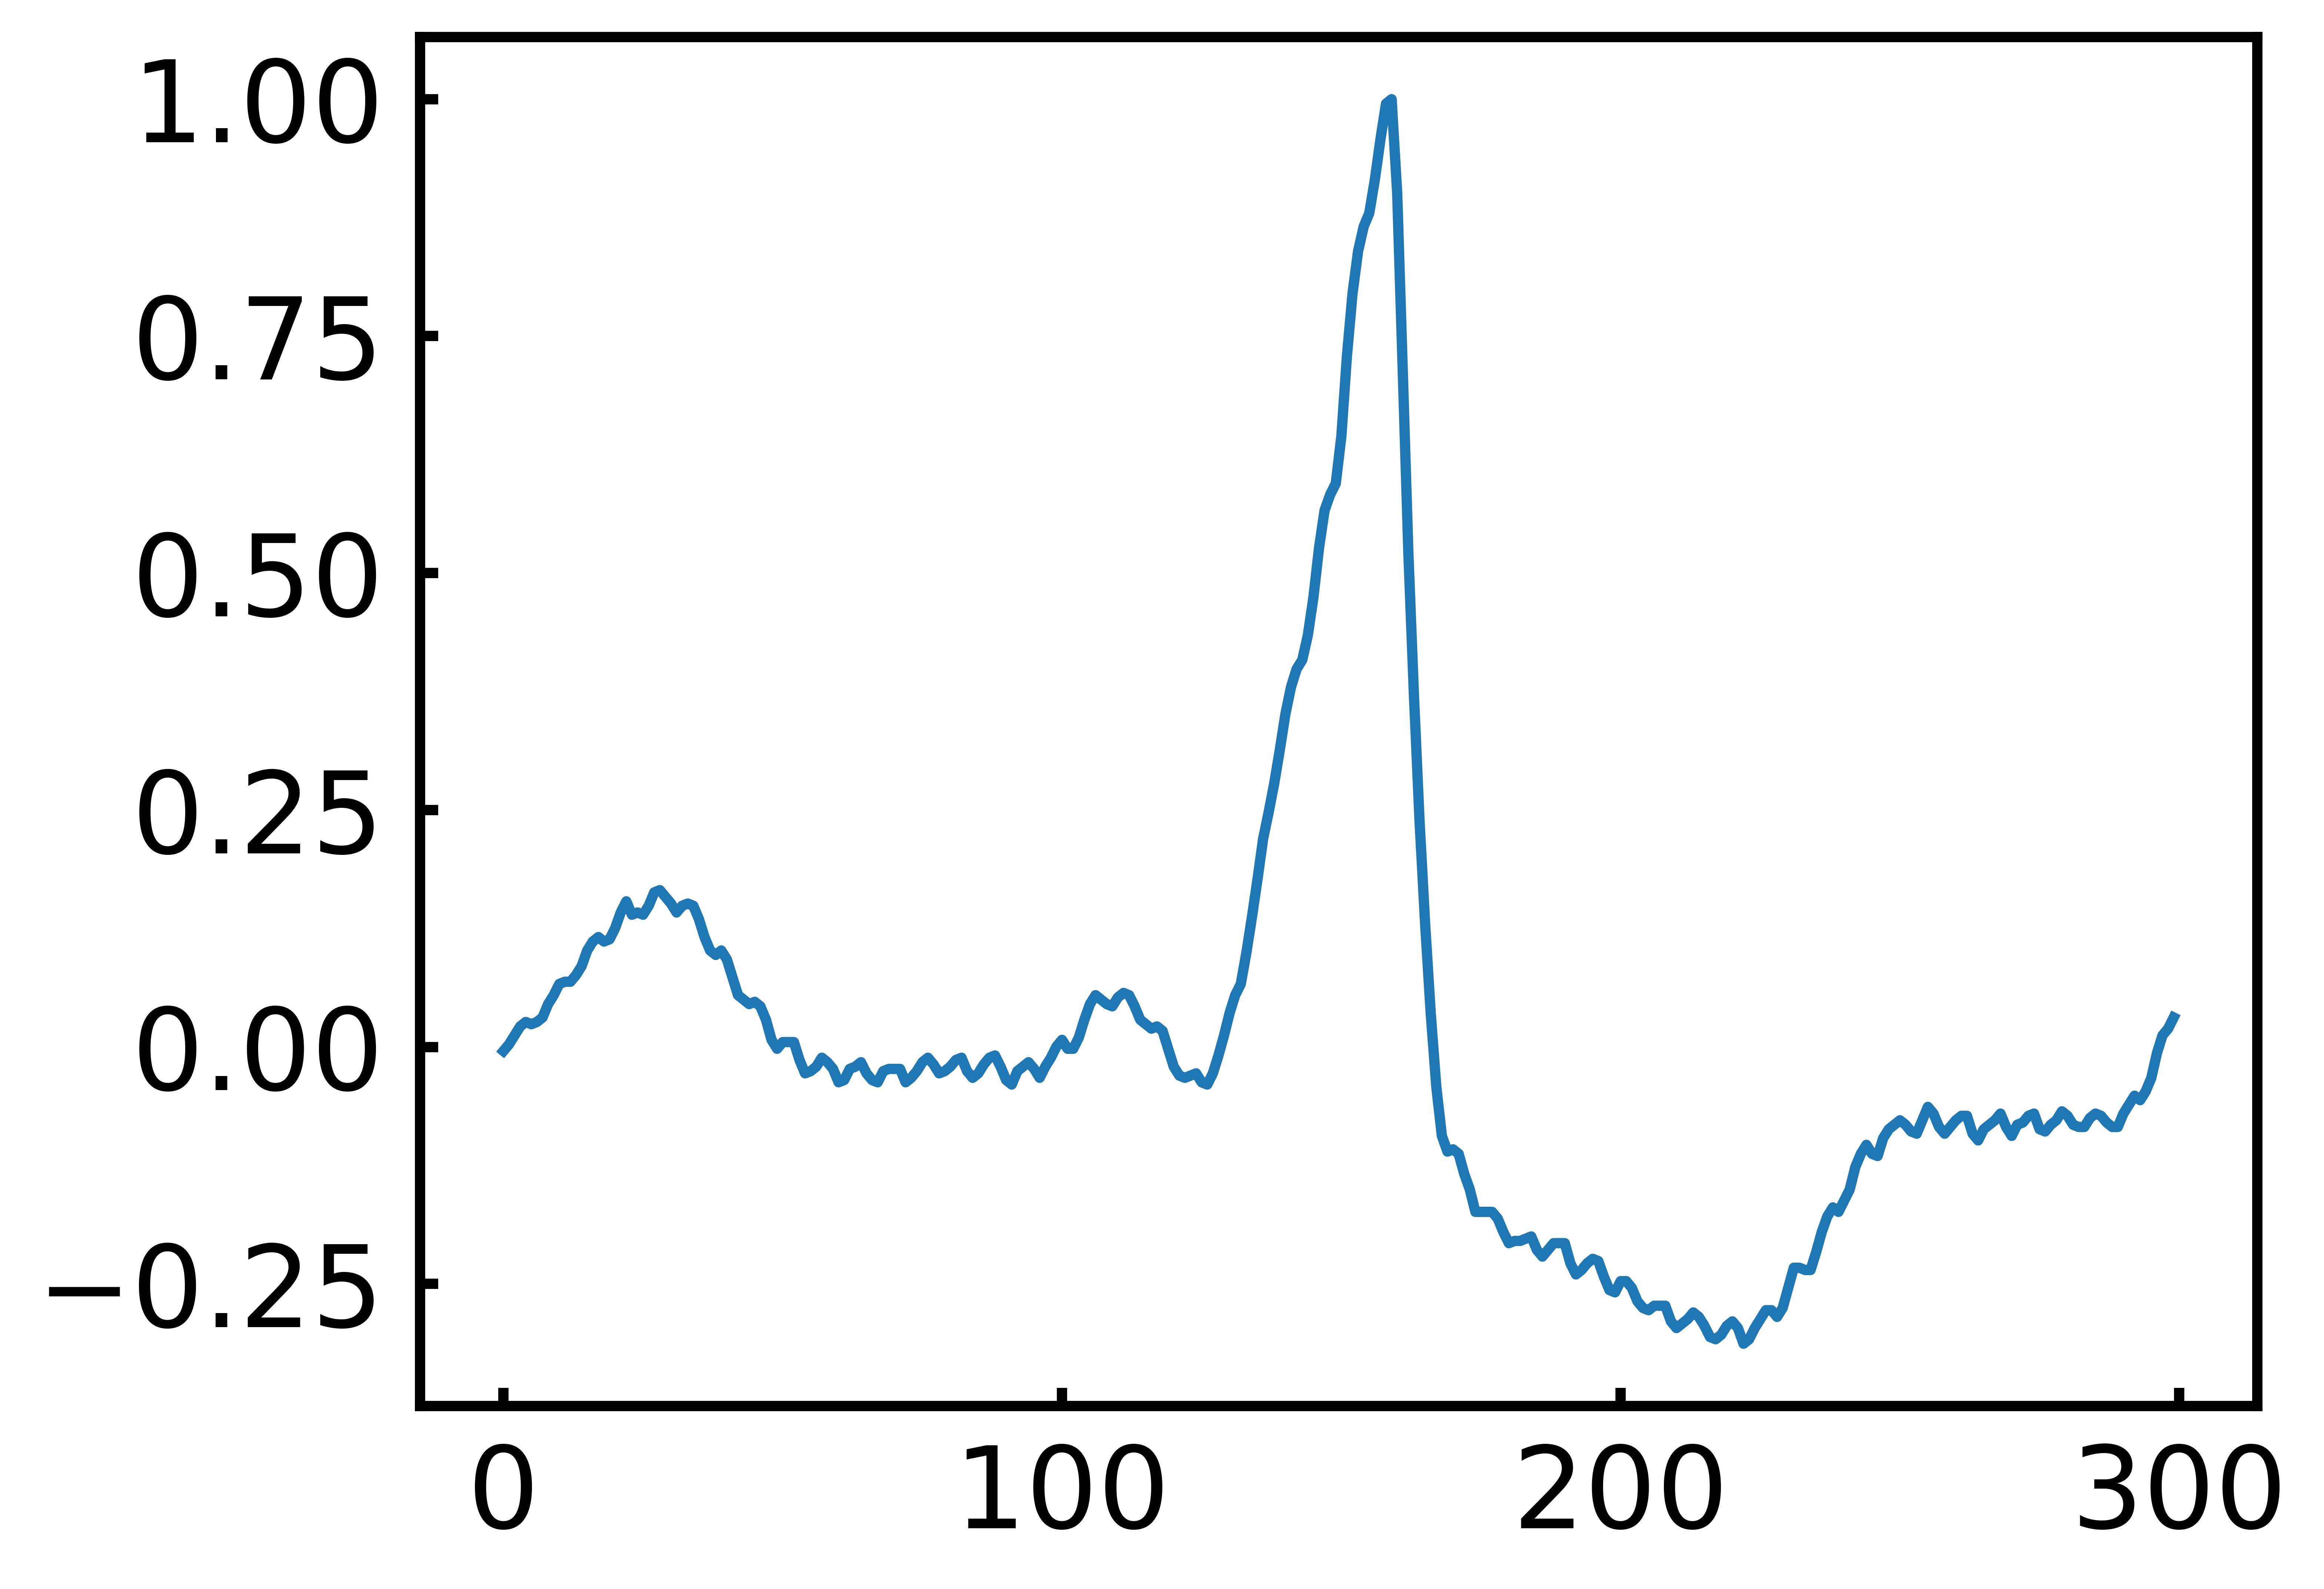

['F']


In [5]:
# 找出F类心拍
url= './physionet.org/files/mitdb/1.0.0/208'
sampfrom=540
sampto=840
record = wfdb.rdrecord(url, # 文件所在路径
                       sampfrom=sampfrom, # 读取100这个记录的起点，从第0个点开始读
                       sampto=sampto, # 读取记录的终点，到1000个点结束
                       physical=False, # 若为True则读取原始信号p_signal，如果为False则读取数字信号d_signal，默认为False
                       channels=[0]) # 读取那个通道，也可以用channel_names指定某个通道;如channel_names=['MLII']
signal = record.d_signal[0:4000]
amplitude = (signal - np.min(signal))
amplitude = amplitude - np.mean(amplitude)
amplitude = amplitude / np.max(amplitude)
amplitude = pd.DataFrame(amplitude)
amplitude.to_csv('ecg_F.csv')  #未去噪的V类ECG数据

plt.plot(amplitude)
plt.show()
signal_ann = wfdb.rdann(url, "atr", sampfrom=sampfrom, sampto=sampto)
# 将读取到的annatations的心拍绘制到心电图上

print(signal_ann.symbol)

### 找到了S型心拍

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman


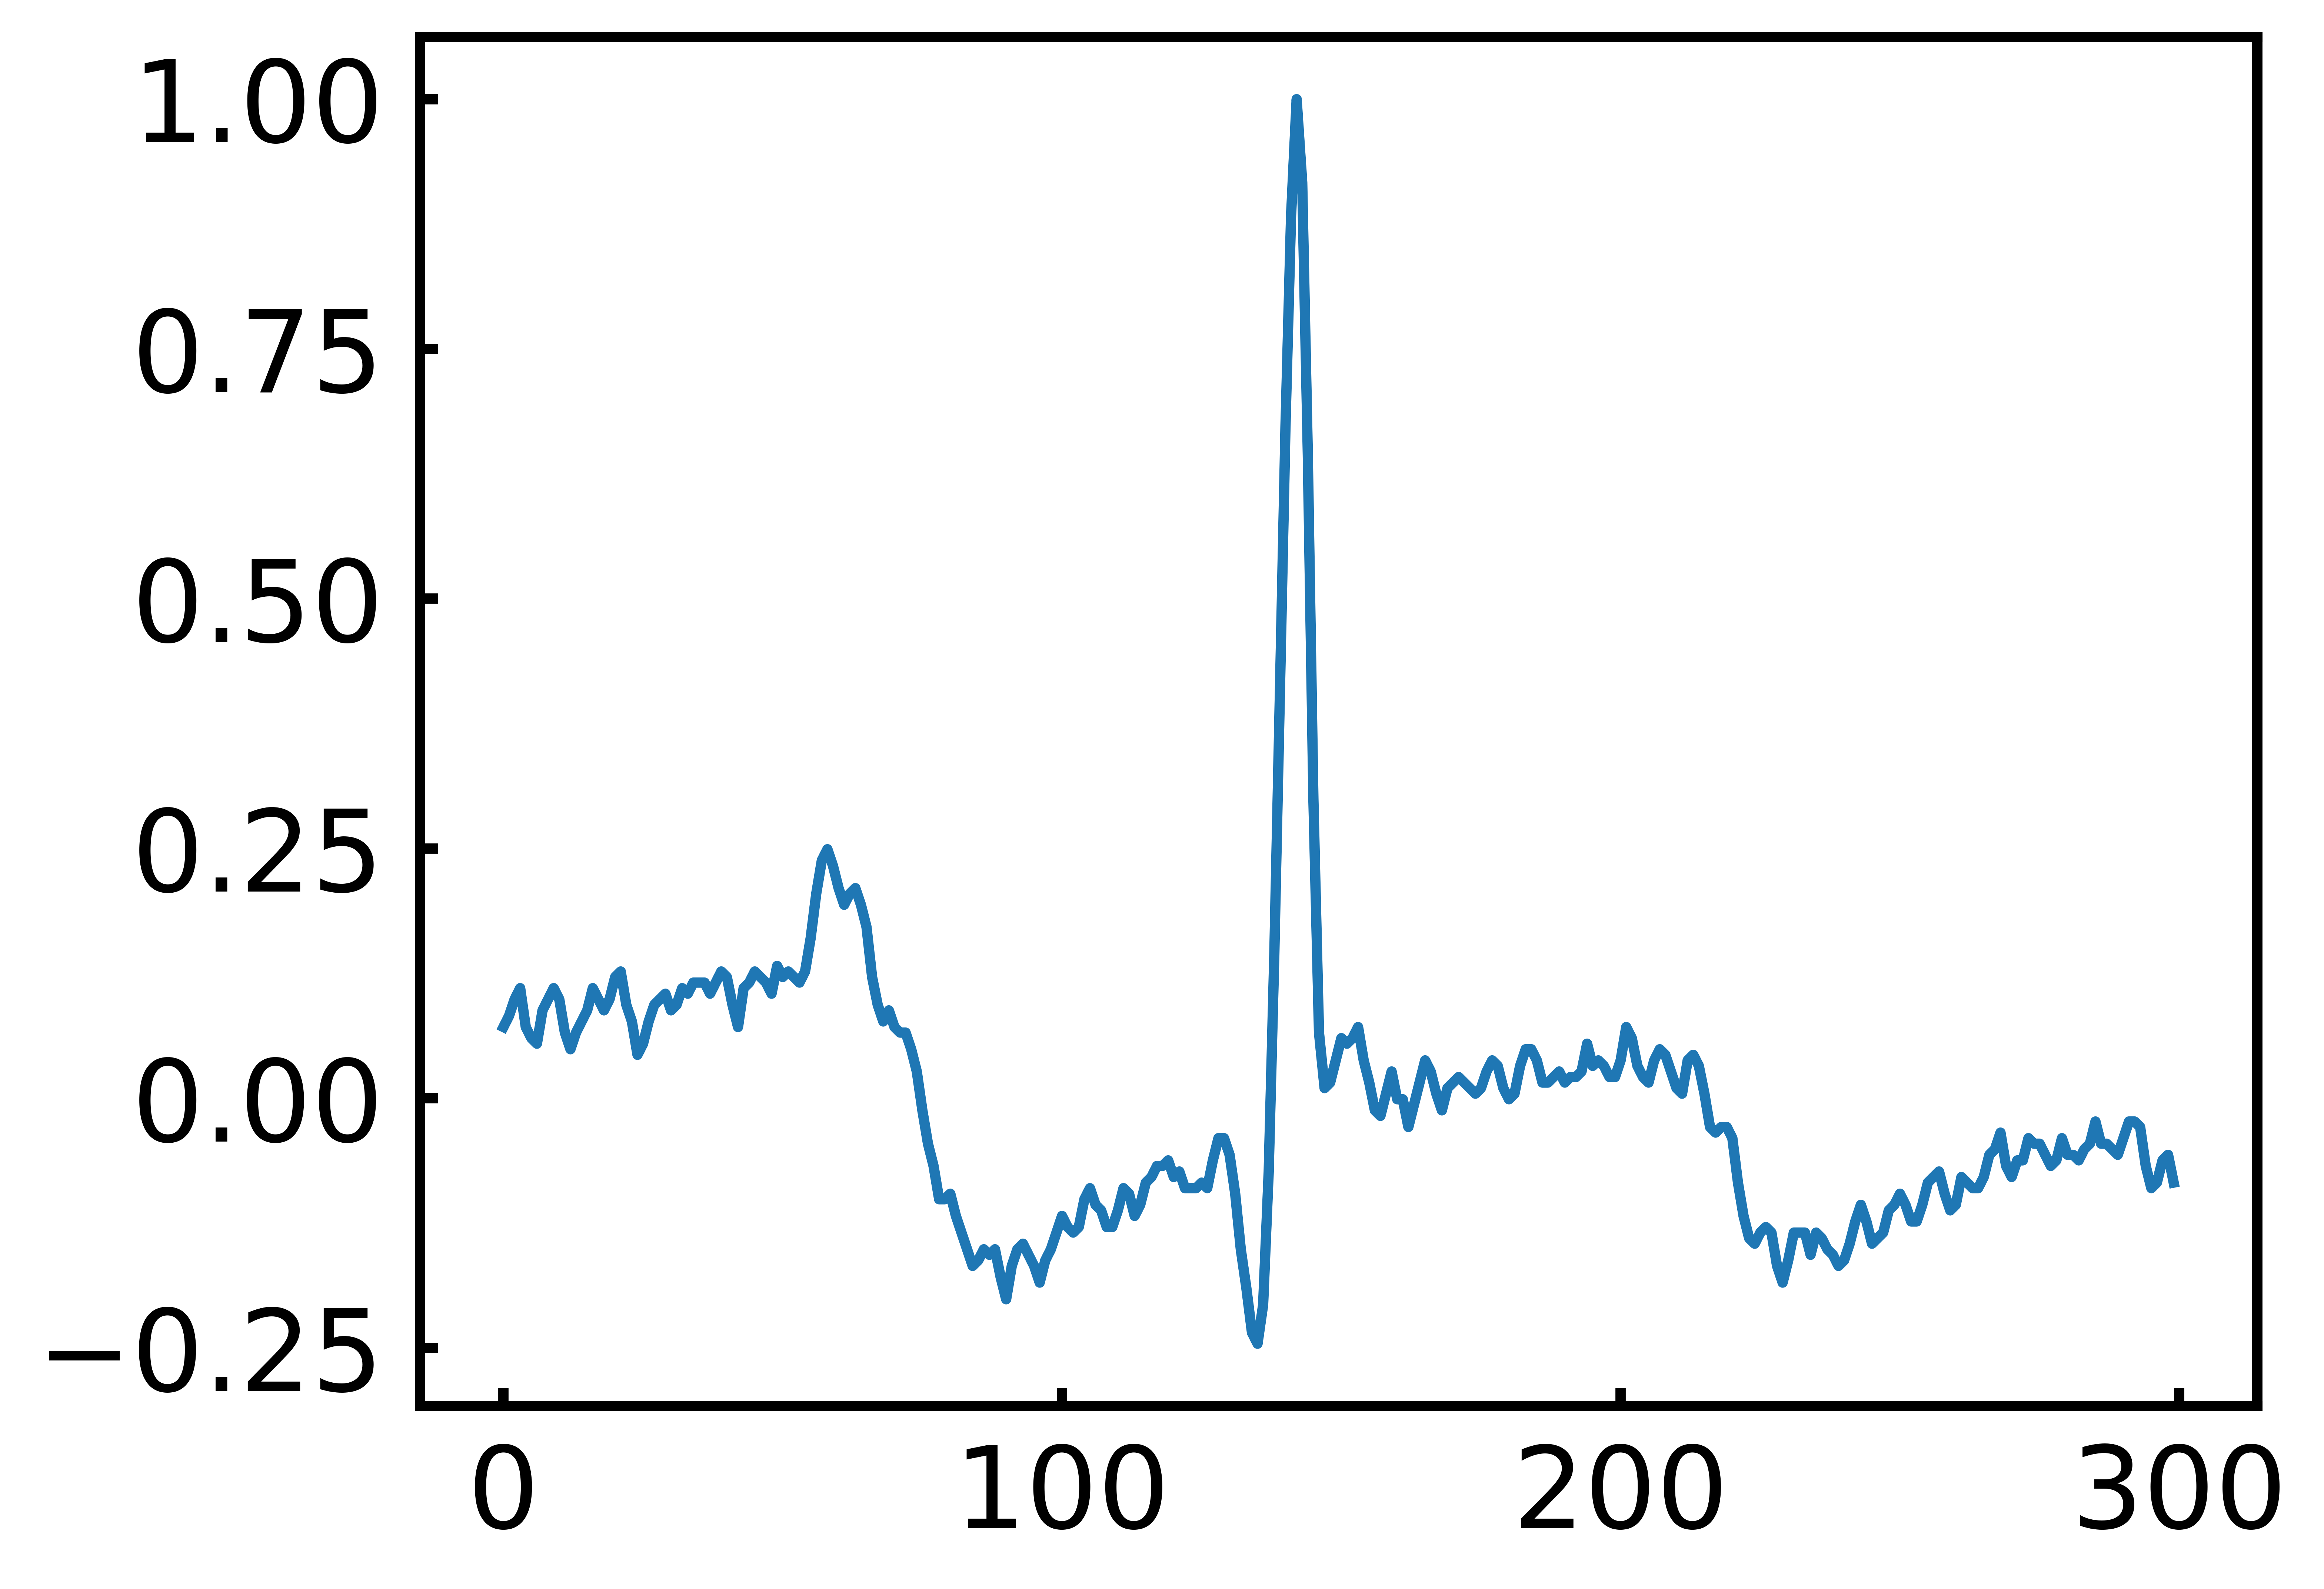

['j']


In [6]:
# 找出S心拍
url= './physionet.org/files/mitdb/1.0.0/222'
record = wfdb.rdrecord(url, # 文件所在路径
                       sampfrom=403800, # 读取100这个记录的起点，从第0个点开始读
                       sampto=404100, # 读取记录的终点，到1000个点结束
                       physical=False, # 若为True则读取原始信号p_signal，如果为False则读取数字信号d_signal，默认为False
                       channels=[0]) # 读取那个通道，也可以用channel_names指定某个通道;如channel_names=['MLII']
signal = record.d_signal[0:8000]
amplitude = (signal - np.min(signal))
amplitude = amplitude - np.mean(amplitude)
amplitude = amplitude / np.max(amplitude)
amplitude = pd.DataFrame(amplitude)
amplitude.to_csv('ecg_S.csv')  #未去噪的V类ECG数据
plt.plot(amplitude)
plt.show()
signal_ann = wfdb.rdann(url, "atr", sampfrom=403500, sampto=403800)
                      

print(signal_ann.symbol)


### 找到了Q型心拍

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman


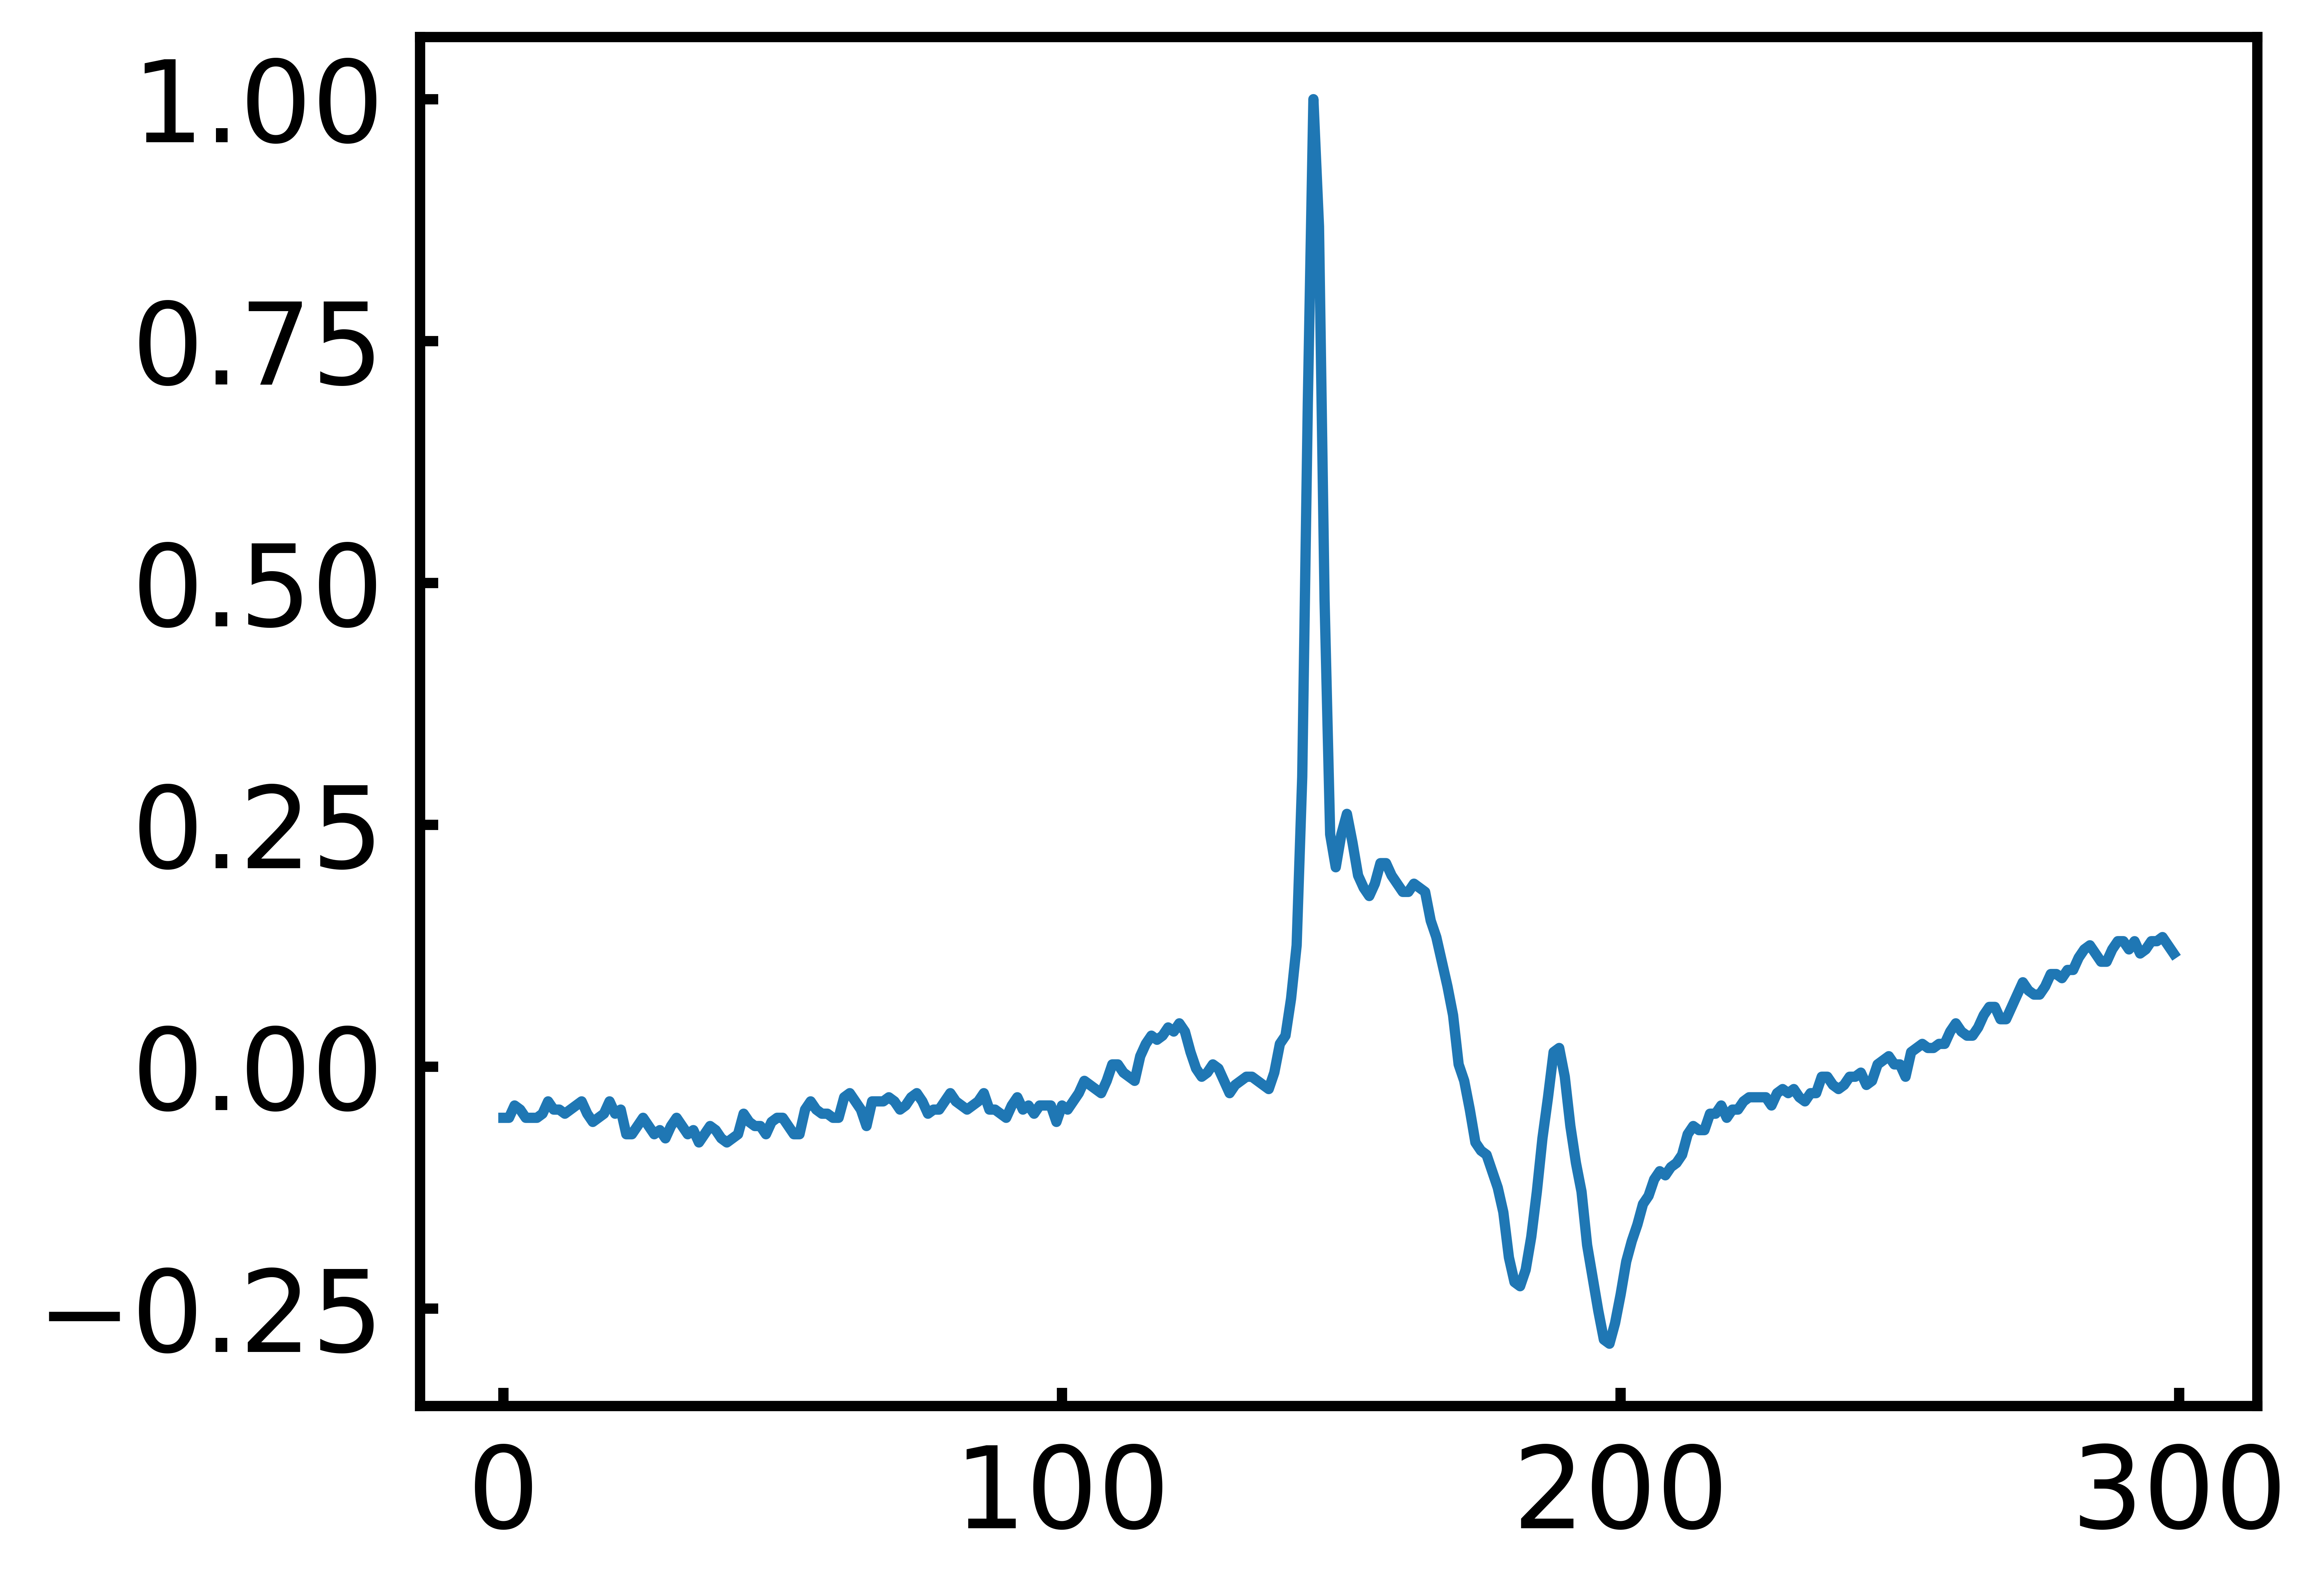

['f']


In [7]:
# 找出Q心拍
url= './physionet.org/files/mitdb/1.0.0/104'
sampfrom=3650 
sampto=3950
record = wfdb.rdrecord(url, # 文件所在路径
                       sampfrom=sampfrom, # 读取100这个记录的起点，从第0个点开始读
                       sampto=sampto, # 读取记录的终点，到1000个点结束
                       physical=False, # 若为True则读取原始信号p_signal，如果为False则读取数字信号d_signal，默认为False
                       channels=[0]) # 读取那个通道，也可以用channel_names指定某个通道;如channel_names=['MLII']
signal = record.d_signal[0:8000]
amplitude = (signal - np.min(signal))
amplitude = amplitude - np.mean(amplitude)
amplitude = amplitude / np.max(amplitude)
amplitude = pd.DataFrame(amplitude)
amplitude.to_csv('ecg_Q.csv')  #未去噪的V类ECG数据

plt.plot(amplitude)
plt.show()
signal_ann = wfdb.rdann(url, "atr", sampfrom=sampfrom, sampto=sampto)
                        

print(signal_ann.symbol)

In [8]:
import os
import wfdb

url='./physionet.org/files/mitdb/1.0.0/'
# Change directory to the desired folder

# Initialize an empty list to store the filenames
filenames = []

# Loop through all files in the directory
for filename in os.listdir(url):
    # Check if the file ends with '.atr'
    if filename.endswith('.atr'):
        # Extract the filename without extension
        base_filename = os.path.splitext(filename)[0]

        # Read the annotation file
        annotation = wfdb.rdann(os.path.join(url,base_filename), 'atr')

        # Check if the annotation contains symbols 'A', 'J', 'S', or 'a'
        if any(symbol in ['P', 'U', 'f'] for symbol in annotation.symbol):
            # Add the filename to the list
            filenames.append(base_filename)

# Print the list of filenames
print(filenames)


os.getcwd()

['217', '104', '102-0', '102']


'/workspaces/ECG-database'

## 转换GADF


### 所有类型心拍都进行转换GADF


In [4]:
import matplotlib.pyplot as plt
from spt.plot_params import set_roman_plot_params
import pandas as pd
import os
import numpy as np
set_roman_plot_params()

def gramian_angular_difference_field(data):
    """
    Converts a 1D time series into a Gramian Angular Difference Field (GADF) image.

    Args:
        data: A 1D numpy array representing the time series data.

    Returns:
        A 2D numpy array representing the GADF image.
    """

    # Normalize data to range [-1, 1]
    data_norm = (data - data.min()) / (data.max() - data.min()) * 2 - 1

    # Convert data to polar coordinates
    phi = np.arccos(data_norm)
    r = np.linspace(0, 1, len(data))

    # Create Gramian Angular Difference Field
    gadf = np.sin(phi[:, np.newaxis] - phi)

    return gadf

# 获取当前文件夹中的所有CSV文件
csv_files = [f for f in os.listdir() if f.endswith('.csv')]

for file in csv_files:
    # 读取CSV文件数据
    data = pd.read_csv(file)

    # 提取强度值数据
    intensity_data = data.iloc[:, 1].values

    # 生成GADF图像
    gadf_image = gramian_angular_difference_field(intensity_data)

    # 可视化GADF图像
    plt.figure(figsize=(8, 8))
    plt.imshow(gadf_image, cmap="coolwarm", aspect='auto')
    # plt.title("N type GADF")
    # plt.colorbar()
    plt.axis('off')
    plt.savefig('GADF_'+file.replace('.csv', '.svg'), dpi=600, bbox_inches='tight')
    plt.close()
    plt.clf()

: 

### 所有类型的心拍都进行s转换

In [1]:
import matplotlib.pyplot as plt
from spt.plot_params import set_roman_plot_params
import pandas as pd
import os
import numpy as np
from scipy.signal import hilbert, resample
set_roman_plot_params()


# S转换
def S_transform(signal, window_size):
    # 对信号进行希尔伯特变换，得到解析信号
    analytic_signal = hilbert(signal)
    
    # 对解析信号进行重采样，使其长度等于窗口大小
    resampled_signal = resample(analytic_signal, window_size)
    
    # 计算S变换，即幅度谱乘以相位谱的共轭
    st = np.abs(resampled_signal) * np.conj(resampled_signal)
    
    return st



csv_files = [f for f in os.listdir() if f.endswith('.csv')]

for file in csv_files:
    # 读取CSV文件数据
    data = pd.read_csv(file)

    # 提取强度值数据
    intensity_data = data.iloc[:, 1].values

    # 生成s_transform图像
    s_transform_image = S_transform(intensity_data,289).reshape((17,17))

    # 可视化GADF图像
    plt.figure(figsize=(8, 8))
    plt.imshow(np.abs(s_transform_image), cmap="coolwarm", aspect='auto')
    # plt.title("N type GADF")
    # plt.colorbar()
    plt.axis('off')
    plt.savefig("s_t_"+file.replace('.csv', '.svg'), dpi=600, bbox_inches='tight')
    plt.close()
    plt.clf()


<Figure size 6400x4800 with 0 Axes>

### 所有类型的心拍都进行Short time Fourier Transform

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from spt.plot_params import set_roman_plot_params
set_roman_plot_params()
import os
import pandas as pd

def stft(signal, window_size=128, hop_size=128):
    # 计算窗口数量
    num_windows = (len(signal) - window_size) // hop_size + 1

    # 初始化STFT结果矩阵
    stft_result = np.zeros((window_size, num_windows), dtype=np.complex128)

    # 应用窗口函数并进行傅里叶变换
    for i in range(num_windows):
        start = i * hop_size
        end = start + window_size
        windowed_signal = signal[start:end] * np.hanning(window_size)
        stft_result[:, i] = np.fft.fft(windowed_signal)

    return stft_result

# 获取当前文件夹中的所有CSV文件
csv_files = [f for f in os.listdir() if f.endswith('.csv')]

for file in csv_files:
    # 读取CSV文件数据
    data = pd.read_csv(file)

    # 提取强度值数据
    intensity_data = data.iloc[:, 1].values

    # 生成s_transform图像
    stft_image = stft(intensity_data)

    # 可视化GADF图像
    plt.figure(figsize=(8, 8))
    # print(stft_image)
    plt.imshow(np.abs(stft_image), cmap="coolwarm", aspect='auto')
    # plt.title("N type GADF")
    # plt.colorbar()
    plt.axis('off')
    plt.savefig("stft_"+file.replace('.csv', '.svg'), dpi=600, bbox_inches='tight')
    plt.close()
    plt.clf()

<Figure size 6400x4800 with 0 Axes>

### 所有类型的心拍都进行Recurrence Plot

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from spt.plot_params import set_roman_plot_params
set_roman_plot_params()
import os

def recurrence_plot(signal, threshold):
    # 计算数据之间的欧氏距离
    distance_matrix = np.abs(np.subtract.outer(signal, signal))
    
    # 根据阈值确定 Recurrence Plot 中的点
    recurrence_matrix = np.zeros_like(distance_matrix)
    recurrence_matrix[distance_matrix <= threshold] = 1

    return recurrence_matrix

# 获取当前文件夹中的所有CSV文件
csv_files = [f for f in os.listdir() if f.endswith('.csv')]

for file in csv_files:
    # 读取CSV文件数据
    data = pd.read_csv(file)

    # 提取强度值数据
    intensity_data = data.iloc[:, 1].values

    # 生成s_transform图像
    rp_image = recurrence_plot(intensity_data,threshold=0.8)

    # 可视化GADF图像
    plt.figure(figsize=(8, 8))
    # print(stft_image)
    plt.imshow(np.abs(rp_image), cmap="coolwarm", aspect='auto')
    # plt.title("N type GADF")
    # plt.colorbar()
    plt.axis('off')
    plt.savefig("RP_"+file.replace('.csv', '.svg'), dpi=600, bbox_inches='tight')
    plt.close()
    plt.clf()

<Figure size 6400x4800 with 0 Axes>

### 所有类型心拍都进行MTF转换

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from spt.plot_params import set_roman_plot_params
set_roman_plot_params()
import os


# 设置马尔科夫转移场的参数
image_size = 10  # 图像大小
n_bins = 5  # 区间数量

# 将一维时间序列数据转换为马尔科夫转移场图像
X_mtf = mtf.transform(signal.reshape(1, -1))

csv_files = [f for f in os.listdir() if f.endswith('.csv')]

for file in csv_files:
    # 读取CSV文件数据
    data = pd.read_csv(file)

    # 提取强度值数据
    intensity_data = data.iloc[:, 1].values

    # 生成MTF转场图像
    mtf = MarkovTransitionField(image_size=image_size, n_bins=n_bins)
    X_mtf = mtf.transform(signal.reshape(1, -1))
    # 可视化MTF转场图像
    plt.figure(figsize=(8, 8))
    plt.imshow(X_mtf[0], cmap="coolwarm", aspect='auto')
    plt.axis('off')
    plt.savefig("MTF_"+file.replace('.csv', '.svg'), dpi=600, bbox_inches='tight')
    plt.close()
    plt.clf()

<Figure size 6400x4800 with 0 Axes>

## 绘制各个类型心拍的平均和方差

### 绘制N类型心拍

In [33]:
# 绘制N类型心拍

import wfdb
import numpy as np
import matplotlib.pyplot as plt
from spt.plot_params import set_roman_plot_params
set_roman_plot_params()
import os

url='./physionet.org/files/mitdb/1.0.0/102'
record = wfdb.rdrecord(url, sampfrom=0, sampto=400000, physical=False, channels=[0])
annotation = wfdb.rdann(url, 'atr', sampfrom=0,sampto=400000)
N_beats = [i for i, ann in enumerate(annotation.symbol) if ann == 'N' or ann=='L' or ann=='R' or ann=='e']

N_beat_samples = []
for i in N_beats:
    r_peak = annotation.sample[i]
    left_index = int(r_peak - 0.28*record.fs)
    right_index = int(r_peak + 0.56*record.fs)
    N_beat = record.d_signal[left_index:right_index, 0].reshape(-1)
    N_beat_samples.append(N_beat)

N_beats_mean = np.mean(N_beat_samples, axis=0)
N_beats_std = np.std(N_beat_samples, axis=0)
amplitude = (N_beats_mean - np.min(N_beats_mean))
amplitude = amplitude - np.mean(amplitude)
amplitude = amplitude / np.max(amplitude)
N_beats_std = np.std(amplitude, axis=0)
# N_beats_
plt.figure(figsize=(8, 6))
plt.plot(amplitude, label='Mean of N beats')
plt.fill_between(np.arange(len(amplitude)), amplitude - N_beats_std, amplitude + N_beats_std, color='gray', alpha=0.3, label='Standard Range')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Amplitude(mV)')
# plt.title('Average of N beats with Standard Range')
plt.savefig('N_class_mean_standard.svg', dpi=800, bbox_inches='tight')
plt.close()
plt.clf()

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

<Figure size 6400x4800 with 0 Axes>

### 绘制Q类型心拍

In [31]:
# 绘制Q类型心拍

import wfdb
import numpy as np
import matplotlib.pyplot as plt
from spt.plot_params import set_roman_plot_params
set_roman_plot_params()
import os

url='./physionet.org/files/mitdb/1.0.0/104'
record = wfdb.rdrecord(url, sampfrom=0, sampto=400000, physical=False, channels=[0])
annotation = wfdb.rdann(url, 'atr', sampfrom=0,sampto=400000)
N_beats = [i for i, ann in enumerate(annotation.symbol) if ann == 'P' or ann == 'U' or ann == 'f']

N_beat_samples = []
for i in N_beats:
    r_peak = annotation.sample[i]
    left_index = int(r_peak - 0.28*record.fs)
    right_index = int(r_peak + 0.56*record.fs)
    N_beat = record.d_signal[left_index:right_index, 0].reshape(-1)
    N_beat_samples.append(N_beat)

N_beats_mean = np.mean(N_beat_samples, axis=0)
N_beats_std = np.std(N_beat_samples, axis=0)
amplitude = (N_beats_mean - np.min(N_beats_mean))
amplitude = amplitude - np.mean(amplitude)
amplitude = amplitude / np.max(amplitude)
N_beats_std = np.std(amplitude, axis=0)
# N_beats_
plt.figure(figsize=(8, 6))
plt.plot(amplitude, label='Mean of Q beats')
plt.fill_between(np.arange(len(amplitude)), amplitude - N_beats_std, amplitude + N_beats_std, color='gray', alpha=0.3, label='Standard Range')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Amplitude(mV)')
# plt.title('Average of N beats with Standard Range')
plt.savefig('Q_class_mean_standard.svg', dpi=800, bbox_inches='tight')
plt.close()
plt.clf()

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

<Figure size 6400x4800 with 0 Axes>

### 绘制S类型心拍

In [32]:
#  绘制S类型心拍

import wfdb
import numpy as np
import matplotlib.pyplot as plt
from spt.plot_params import set_roman_plot_params
set_roman_plot_params()
import os

url= './physionet.org/files/mitdb/1.0.0/222'
record = wfdb.rdrecord(url, sampfrom=0, sampto=400000, physical=False, channels=[0])
annotation = wfdb.rdann(url, 'atr', sampfrom=0,sampto=400000)
N_beats = [i for i, ann in enumerate(annotation.symbol) if ann == 'A' or ann == 'J' or ann == 'S' or ann =='a']

N_beat_samples = []
for i in N_beats:
    r_peak = annotation.sample[i]
    left_index = int(r_peak - 0.28*record.fs)
    right_index = int(r_peak + 0.56*record.fs)
    N_beat = record.d_signal[left_index:right_index, 0].reshape(-1)
    N_beat_samples.append(N_beat)

N_beats_mean = np.mean(N_beat_samples, axis=0)
N_beats_std = np.std(N_beat_samples, axis=0)
amplitude = (N_beats_mean - np.min(N_beats_mean))
amplitude = amplitude - np.mean(amplitude)
amplitude = amplitude / np.max(amplitude)
N_beats_std = np.std(amplitude, axis=0)
# N_beats_
plt.figure(figsize=(8, 6))
plt.plot(amplitude, label='Mean of S beats')
plt.fill_between(np.arange(len(amplitude)), amplitude - N_beats_std, amplitude + N_beats_std, color='gray', alpha=0.3, label='Standard Range')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Amplitude(mV)')
# plt.title('Average of N beats with Standard Range')
plt.savefig('S_class_mean_standard.svg', dpi=800, bbox_inches='tight')
plt.close()
plt.clf()

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

<Figure size 6400x4800 with 0 Axes>

### 绘制V类型心拍

In [36]:
#  绘制V类型心拍

import wfdb
import numpy as np
import matplotlib.pyplot as plt
from spt.plot_params import set_roman_plot_params
set_roman_plot_params()
import os

url= './physionet.org/files/mitdb/1.0.0/109'
record = wfdb.rdrecord(url, sampfrom=0, sampto=400000, physical=False, channels=[0])
annotation = wfdb.rdann(url, 'atr', sampfrom=0,sampto=400000)
N_beats = [i for i, ann in enumerate(annotation.symbol) if ann == 'E' or ann == 'V']

N_beat_samples = []
for i in N_beats:
    r_peak = annotation.sample[i]
    left_index = int(r_peak - 0.28*record.fs)
    right_index = int(r_peak + 0.56*record.fs)
    N_beat = record.d_signal[left_index:right_index, 0].reshape(-1)
    N_beat_samples.append(N_beat)

N_beats_mean = np.mean(N_beat_samples, axis=0)
N_beats_std = np.std(N_beat_samples, axis=0)
amplitude = (N_beats_mean - np.min(N_beats_mean))
amplitude = amplitude - np.mean(amplitude)
amplitude = amplitude / np.max(amplitude)
N_beats_std = np.std(amplitude, axis=0)
# N_beats_
plt.figure(figsize=(8, 6))
plt.plot(amplitude, label='Mean of V beats')
plt.fill_between(np.arange(len(amplitude)), amplitude - N_beats_std, amplitude + N_beats_std, color='gray', alpha=0.3, label='Standard Range')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Amplitude(mV)')
# plt.title('Average of N beats with Standard Range')
plt.savefig('V_class_mean_standard.svg', dpi=800, bbox_inches='tight')
plt.close()
plt.clf()

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

<Figure size 6400x4800 with 0 Axes>

### 绘制F型心拍

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

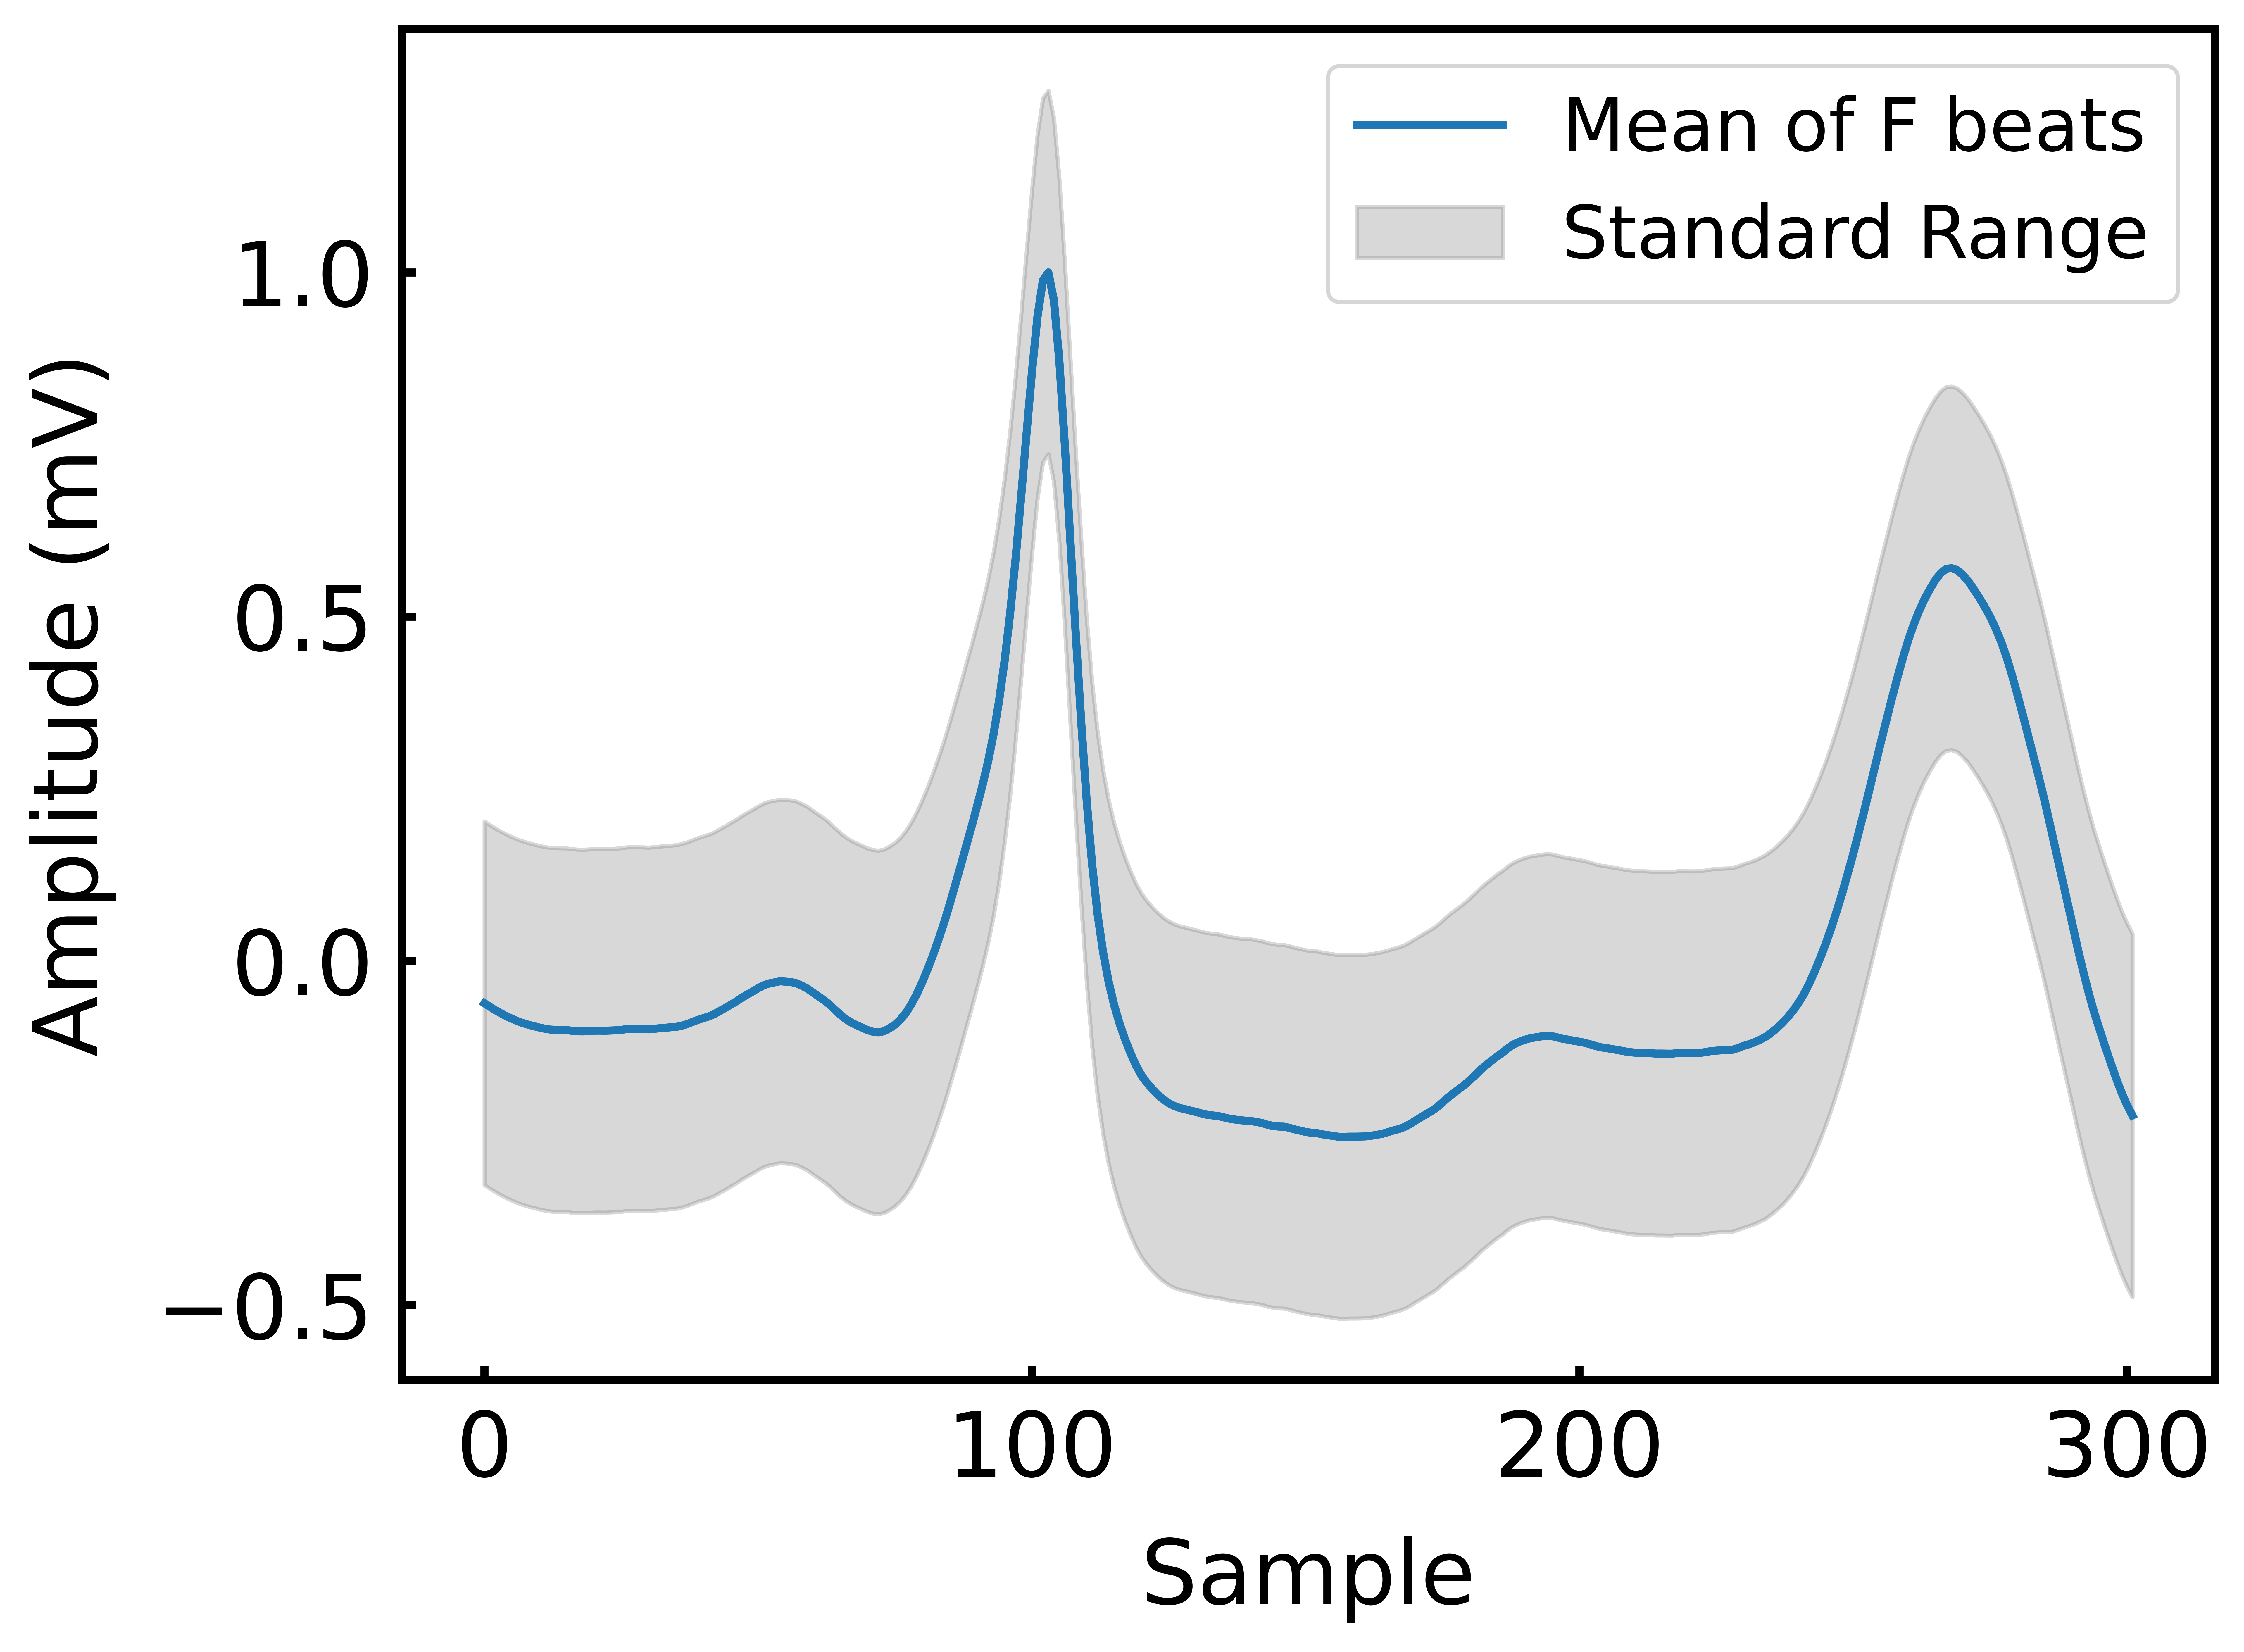

In [44]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

url = './physionet.org/files/mitdb/1.0.0/208'
record = wfdb.rdrecord(url, sampfrom=0, sampto=400000, physical=False, channels=[0])
annotation = wfdb.rdann(url, 'atr', sampfrom=0, sampto=400000)
N_beats = [i for i, ann in enumerate(annotation.symbol) if ann == 'F']

N_beat_samples = []
for i in N_beats:
    r_peak = annotation.sample[i]
    left_index = int(r_peak - 0.28 * record.fs)
    right_index = int(r_peak + 0.56 * record.fs)
    N_beat = record.d_signal[left_index:right_index, 0].reshape(-1)
    N_beat_samples.append(N_beat)

max_length = max(len(beat) for beat in N_beat_samples)
N_beat_samples_padded = [np.concatenate((beat, np.zeros(max_length - len(beat)))) for beat in N_beat_samples]

N_beats_mean = np.mean(N_beat_samples_padded, axis=0)
N_beats_std = np.std(N_beat_samples_padded, axis=0)

amplitude = (N_beats_mean - np.min(N_beats_mean))
amplitude = amplitude - np.mean(amplitude)
amplitude = amplitude / np.max(amplitude)
N_beats_std = np.std(amplitude, axis=0)

plt.figure(figsize=(8, 6))
plt.plot(amplitude, label='Mean of F beats')
plt.fill_between(np.arange(len(amplitude)), amplitude - N_beats_std, amplitude + N_beats_std, color='gray', alpha=0.3, label='Standard Range')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Amplitude (mV)')
plt.savefig('F_class_mean_standard.svg', dpi=800, bbox_inches='tight')
plt.show()